In [8]:
#Generate kmeans access trace

'''
Author: Giulio Stramondo
The access trace generation is based on the study of the openmp implementationin the rodinia framework.
From the memory access point of view the kmeans algorithm can be summarized as follow:
1- Read a point
2- compute the distance from the point and each cluster center ( Therefore access all the cluster centers )
3- Update the location of the cluster centers ( Therefore access all the cluster centers )
4- Repeat 1,2,3 until convergence or reach the maximum number of iteration.
'''

import sys
output_file = "rodinia_test_100_chess_sparser_1read_1to8spaces.atrace"
npoints = 100
nfeatures= 35
nclusters = 5

f = open(output_file,"w")
for i in range(0,npoints):
    #Read one point
    for j in range(0,nfeatures):
        if (i*nfeatures+j)%((i%7)+1) == 0:
            f.write("A["+str(i)+"]["+str(j)+"], ")

    #For each point read all the cluster centers.
    for i1 in range(npoints,npoints+nclusters):
        for j in range(0,nfeatures):
            if j==nfeatures-1 and i1==npoints+nclusters-1:
                if (i1*nfeatures+j)%((i1%7)+1) == 0:
                    f.write("A["+str(i1)+"]["+str(j)+"];\n")

                else:
                     f.write(";\n")
            else:
                if (i1*nfeatures+j)%((i1%7)+1) == 0:
                    f.write("A["+str(i1)+"]["+str(j)+"], ")

    
#Update the cluster center location
for i1 in range(npoints,npoints+nclusters):
    for j in range(0,nfeatures):
        if j==nfeatures-1 and i1==npoints+nclusters-1:
            if (i1*nfeatures+j)%((i1%7)+1) == 0:
                f.write("A["+str(npoints+nclusters-1)+"]["+str(nfeatures-1)+"];\n")

            else:
                f.write(";\n")

        else:
            if (i1*nfeatures+j)%((i1%7)+1) == 0:
                f.write("A["+str(i1)+"]["+str(j)+"], ")


In [21]:
counter=0
f = open(output_file,"w")
for i in range(0,npoints):
    #Read one point
    for j in range(0,nfeatures):
        if (i*nfeatures+j)%3 == 0:
            sys.stdout.write("A["+str(i)+"]["+str(j)+"], ")
            counter=counter+1
    #For each point read all the cluster centers.
    for i1 in range(npoints,npoints+nclusters):
        for j in range(0,nfeatures):
            if j==nfeatures-1 and i1==npoints+nclusters-1:
                if (i1*nfeatures+j)%3 == 0:
                    sys.stdout.write("A["+str(i1)+"]["+str(j)+"];\n")
                else:
                     sys.stdout.write(";\n")
            else:
                if (i1*nfeatures+j)%3 == 0:
                    sys.stdout.write("A["+str(i1)+"]["+str(j)+"], ")
                    counter=counter+1
    
#Update the cluster center location
for i1 in range(npoints,npoints+nclusters):
    for j in range(0,nfeatures):
        if j==nfeatures-1 and i1==npoints+nclusters-1:
            if (i1*nfeatures+j)%3 == 0:
                sys.stdout.write("A["+str(npoints+nclusters-1)+"]["+str(nfeatures-1)+"];\n")
                counter=counter+1
            else:
                sys.stdout.write(";\n")
        else:
            if (i1*nfeatures+j)%3 == 0:
                sys.stdout.write("A["+str(i1)+"]["+str(j)+"], ")
                counter=counter+1


A[0][0], A[0][3], A[0][6], A[0][9], A[0][12], A[0][15], A[0][18], A[0][21], A[0][24], A[0][27], A[0][30], A[0][33], A[100][1], A[100][4], A[100][7], A[100][10], A[100][13], A[100][16], A[100][19], A[100][22], A[100][25], A[100][28], A[100][31], A[100][34], A[101][2], A[101][5], A[101][8], A[101][11], A[101][14], A[101][17], A[101][20], A[101][23], A[101][26], A[101][29], A[101][32], A[102][0], A[102][3], A[102][6], A[102][9], A[102][12], A[102][15], A[102][18], A[102][21], A[102][24], A[102][27], A[102][30], A[102][33], A[103][1], A[103][4], A[103][7], A[103][10], A[103][13], A[103][16], A[103][19], A[103][22], A[103][25], A[103][28], A[103][31], A[103][34], A[104][2], A[104][5], A[104][8], A[104][11], A[104][14], A[104][17], A[104][20], A[104][23], A[104][26], A[104][29], A[104][32], ;
A[1][1], A[1][4], A[1][7], A[1][10], A[1][13], A[1][16], A[1][19], A[1][22], A[1][25], A[1][28], A[1][31], A[1][34], A[100][1], A[100][4], A[100][7], A[100][10], A[100][13], A[100][16], A[100][19], A[10

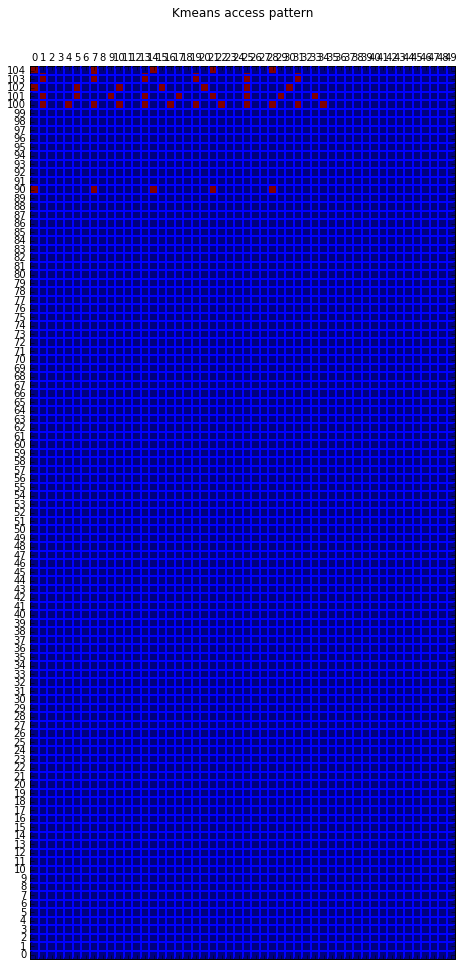

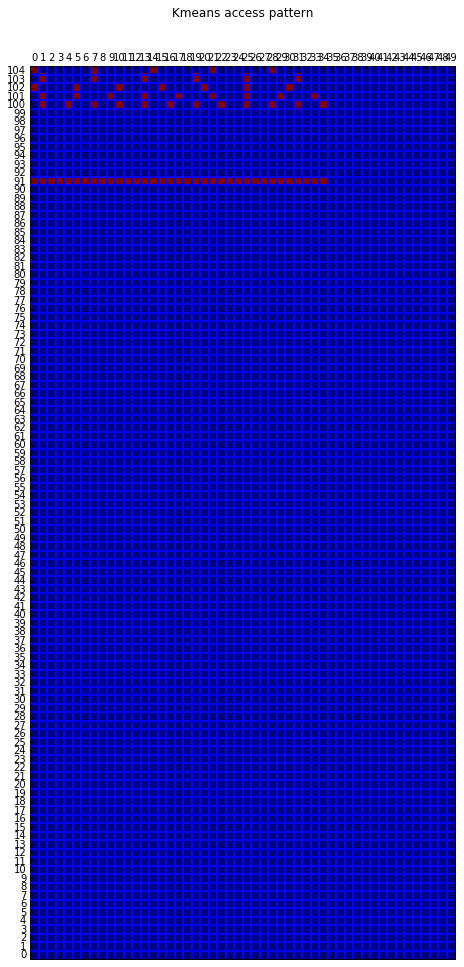

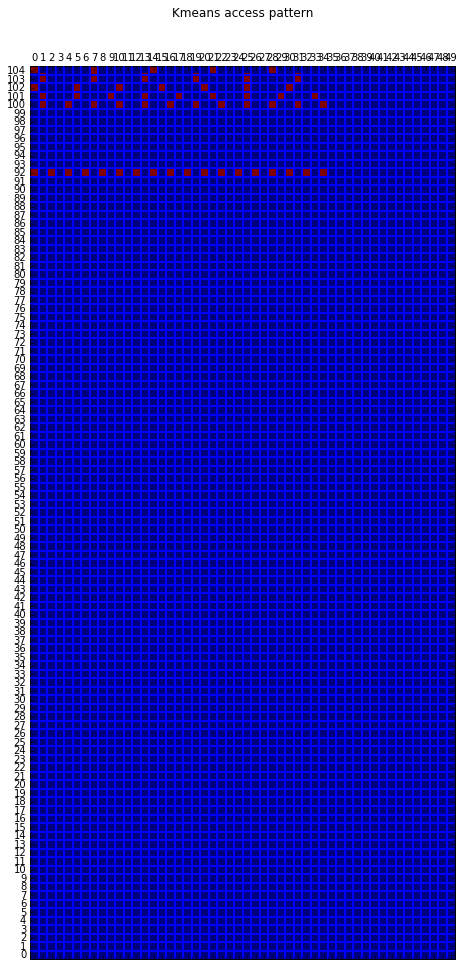

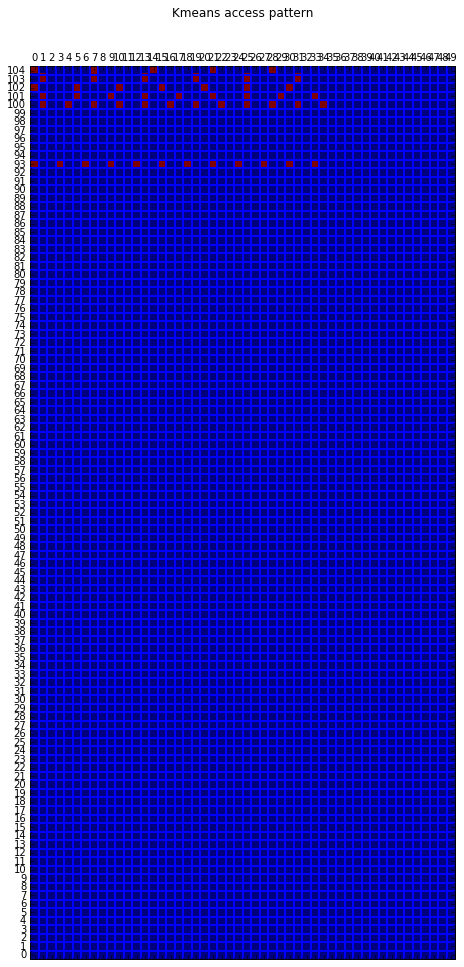

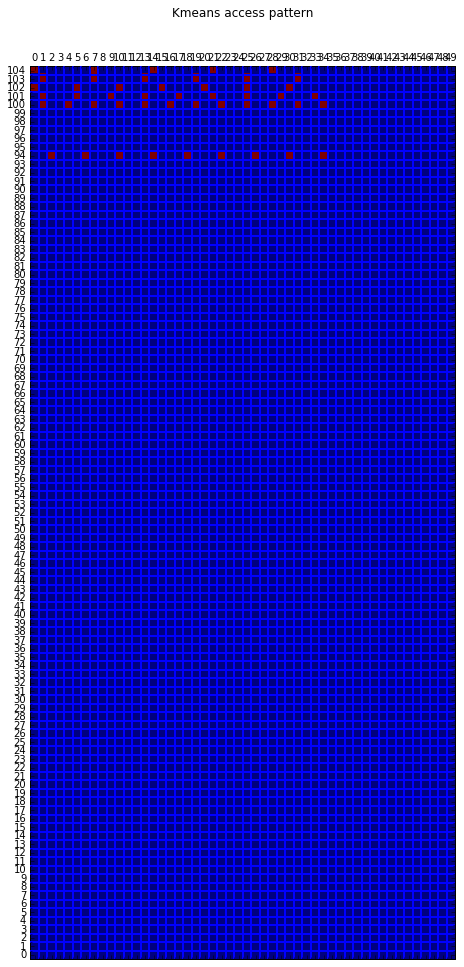

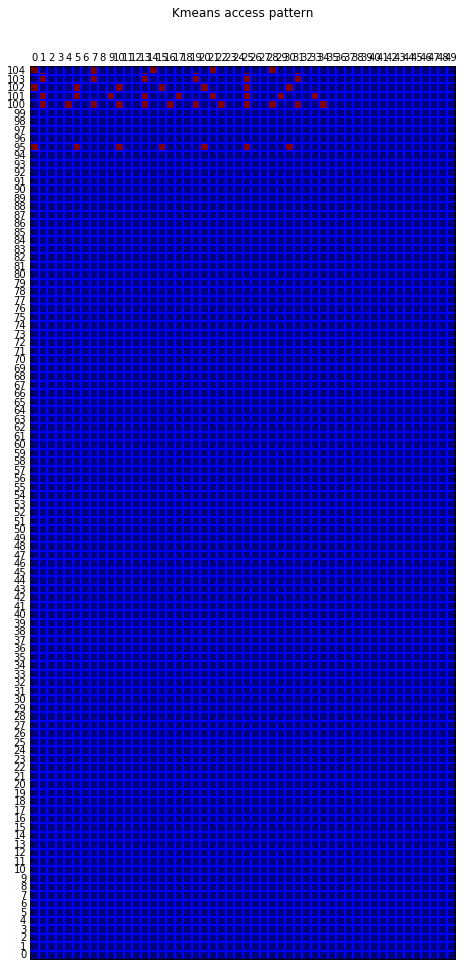

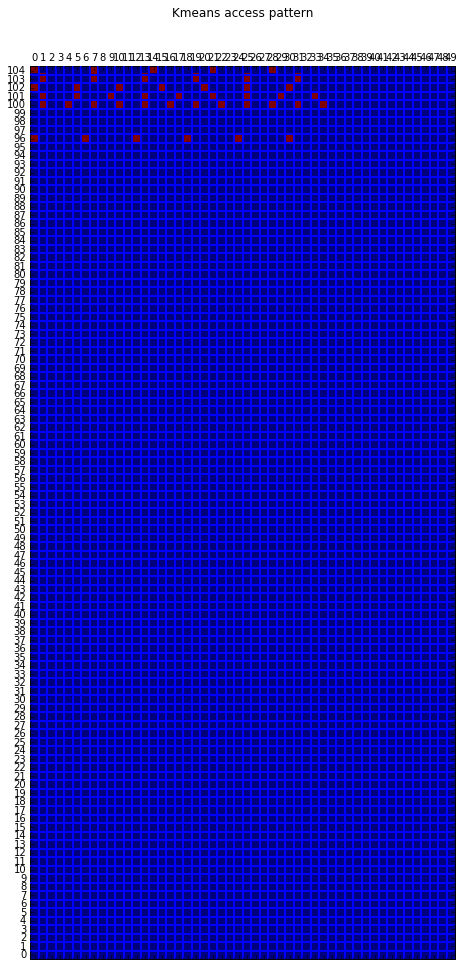

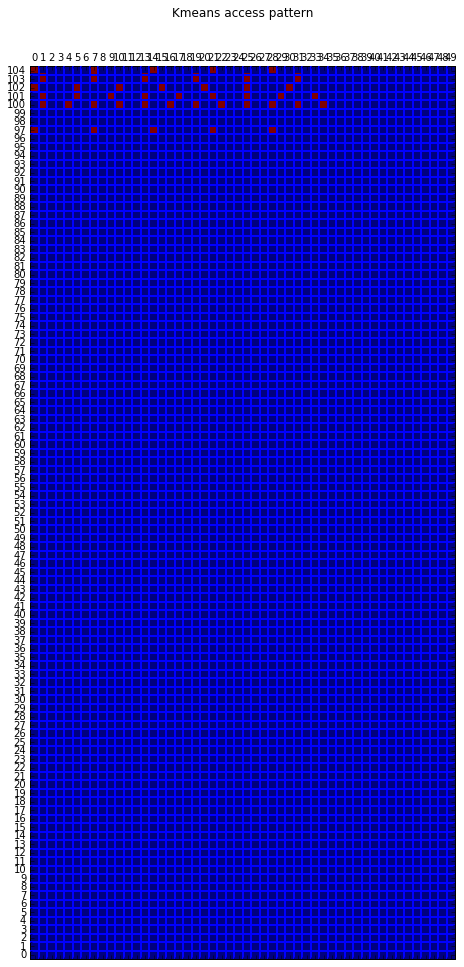

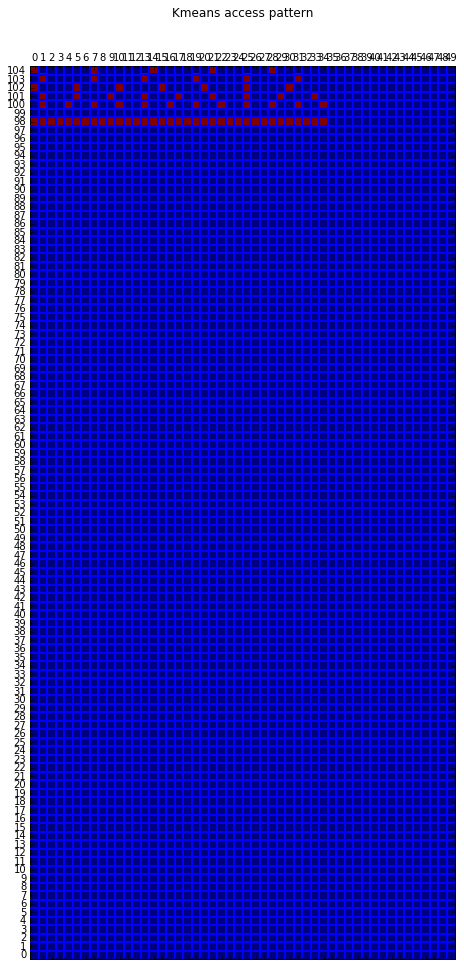

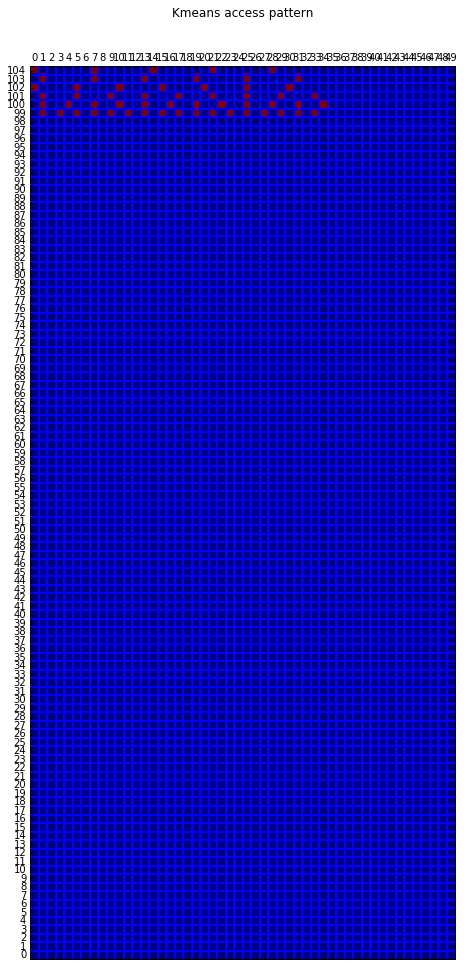

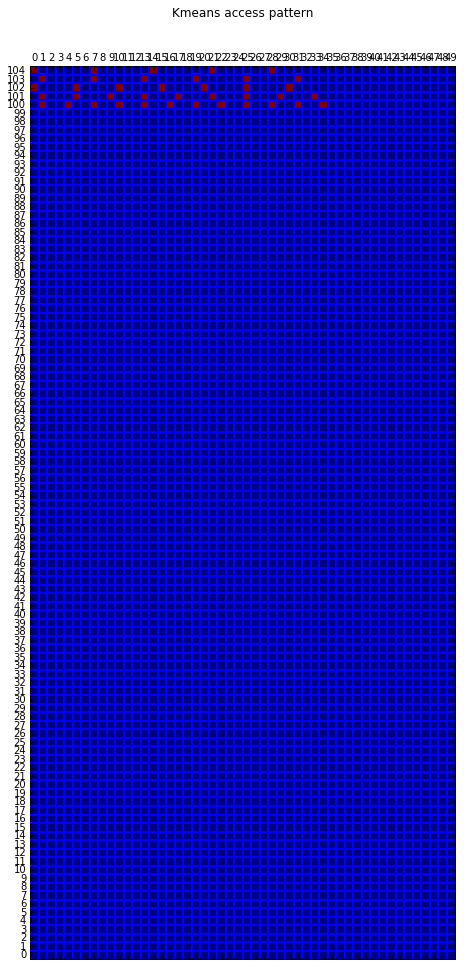

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import prf_utils
activePointsList = prf_utils.parseATrace("/Users/giuliostramondo/Projects/H2RC16/rodinia_test_100_chess_sparser_1read_1to8spaces.atrace")

for i in range(90,len(activePointsList)):
    prf_utils.plot_array(prf_utils.create_plane_image((105,50)), list(set(activePointsList[i])), "Kmeans access pattern")